<a href="https://colab.research.google.com/github/virgantara/sentiment-analysis/blob/master/Sentiment_Analysis_US_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pendahuluan
Analisis sentimen mengacu pada proses analisis terhadap pendapat atau perasaan tentang sesuatu yang menggunakan data seperti teks atau gambar. Analisis sentimen banyak membantu dalam proses pengambilan keputusan. Misalnya, jika sentimen publik terhadap suatu produk tidak begitu baik, sebuah perusahaan dapat mencoba untuk memodifikasi produk atau menghentikan produksi sama sekali untuk menghindari kerugian.

Ada banyak sumber sentimen publik, misalnya: wawancara publik, jajak pendapat, survei, dll. Namun, dengan semakin banyak orang bergabung dengan platform media sosial, situs web seperti Facebook dan Twitter dapat diambil untuk sentimen publik.

### Rumusan Masalah
Ada cuitan dari Twitter tentang enam maskapai AS. Isinya adalah tweet yang berisi sentimen positif, negatif, atau netral tentang maskapai.

### Import Library
import semua library yang diperlukan

In [149]:

import numpy as np 
import pandas as pd 
import re
import nltk 
nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Membaca dataset
Di sini, dataset dari twitter dibaca dengan 
    <code>read_csv</code> dan menampilkan top 5 dataset dengan <code>head()</code>

In [150]:
import pandas as pd
airline_tweets = pd.read_csv("https://raw.githubusercontent.com/virgantara/sentiment-analysis/master/Tweets.csv")
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Untuk mudahkan pembacaan, maka ukuran figur diperbesar

In [151]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


### Analisis Data
Kita lihat perbandingan twit berdasarkan jenis sentimen. 

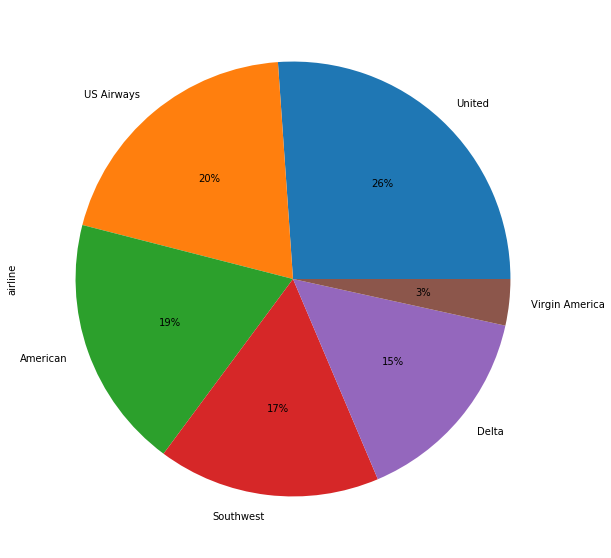

In [152]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

Dari data sentimen, cuitan, maskapai United menempati posisi tertinggi dengan 26% dan diikuti dengan maskapai US Airways dan American masing-masing sebesar 20% dan 19%. 

Lalu, sentimen apa yang paling banyak muncul diantara maskapai tersebut? Apakah negatif, positif, atau netral? Mari kita lihat hasilnya

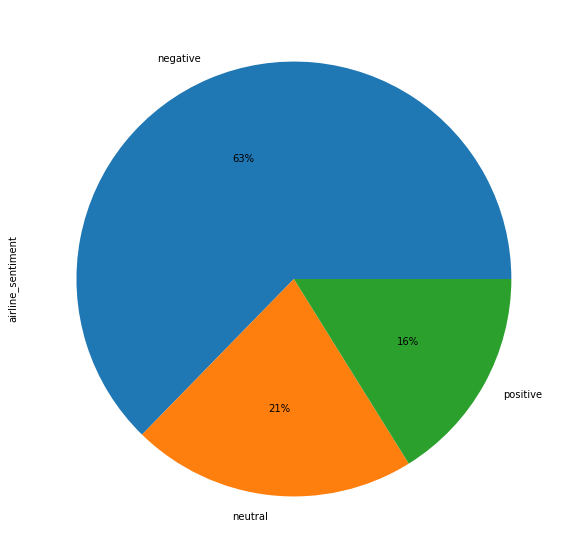

In [153]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

Ternyata, mayoritas responden kurang puas atas kondisi maskapai di Amerika. Hal ini berdasarkan 60% data cuitan yang cenderung negatif. 
Selanjutnya, kita analisis hubungan antara maskapai dengan sentimennya. Kita lihat maskapai mana yang mendapat sentimen negatif paling banyak.

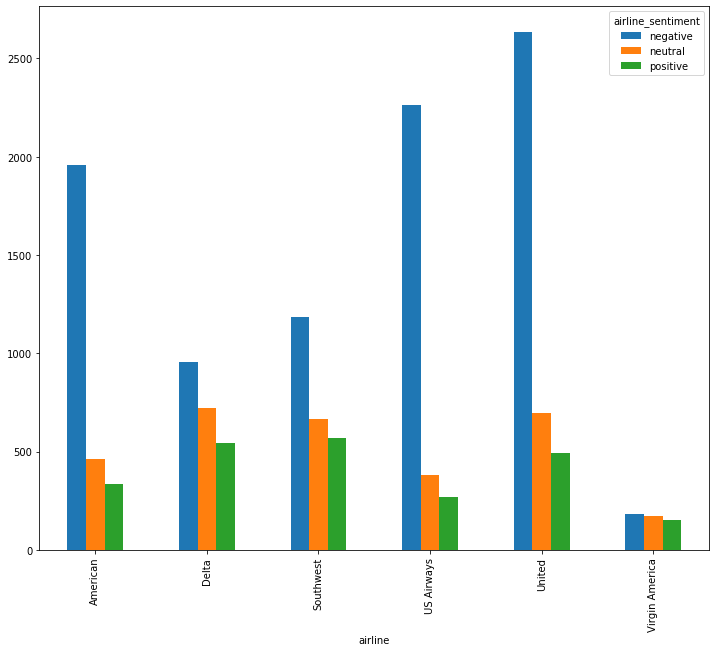

In [154]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')


Mayoritas respon cenderung negatif. Posisi teratas terkait sentimen negatif dipegang oleh maskapai United, kemudian diikuti oleh US Airways dan American.  



### Data Cleaning

Data Cleaning merupakan salah satu tahap pada data preprocessing dari text-mining. Cuitan di Twitter berisi tanda baca dan kata-kata yang tidak diperlukan dalam text mining. 

Dari dataset ini, cuitan berada pada kolom ke-11, sedangkan label sentimen ada di kolom ke-2. Kolom ke-2 selanjutnya sebagai kolom fitur. 

Untuk mengambil fitur dan label, kita menggunakan kode berikut:

In [0]:
fitur = airline_tweets.iloc[:,10].values
labels = airline_tweets.iloc[:,1].values

Selanjutnya, dengan script berikut, kita 'bersihkan' fitur dari karakter-karakter yang tidak diperlukan.

In [0]:
fitur_ekstraksi = []
for cuitan in range(0, len(fitur)):
  tmp = re.sub(r'\W', ' ',str(fitur[cuitan])) # membuang karakter khusus selain angka dan huruf
  tmp = re.sub(r'\s+[a-zA-Z]\s+', ' ',str(fitur[cuitan])) # membuang kata yang hanya satu huruf
  tmp = re.sub(r'\^[a-zA-Z]\s+', ' ',str(fitur[cuitan])) # membuang kata yang hanya satu huruf dari awal
  tmp = re.sub(r'\s+', ' ',str(fitur[cuitan])) # mengganti spasi ganda dengan spasi tunggal
  tmp = re.sub(r'^b\s+', ' ',str(fitur[cuitan])) # membuang semua awalan 'b'
  tmp = tmp.lower()
  fitur_ekstraksi.append(tmp)

Dari kode di atas, kita sudah mendapatkan data yang sudah matang dan bersih dari karakter yang tidak diperlukan. 

### Bag of Words
Bag of Words (BoW) adalah bagian dari NLP yang berfungsi untuk penyederhanaan model dari dataset teks. Di bagian BoW ini, data teks atau kalimat direpresentasikan dalam bentuk vektor. Vektor adalah bentuk 1 dimensi dari matriks atau array 1 dimensi. Sebagai contoh:
<pre>
(1) Budi suka makan nasi goreng dan minum es degan. Edi suka makan nasi uduk.
(2) Agus juga suka dengan makan bakso dan minum es teh.
</pre>
Dua kalimat tersebut, apabila dijadikan dalam bentuk BoW:
<pre>
daftar_kata = ['Budi','suka','makan','nasi','goreng','Agus','juga','dengan','bakso','dan','minum','es','teh','degan','Susi','uduk']
</pre>
sedangkan vektor dari masing-masing kalimat adalah:
<pre>
kalimat1 = [1,2,2,2,1,0,0,0,0,1,1,1,0,1,1,1]
kalimat2 = [0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,0]
</pre>
Angka pada <code>kalimat1</code> dan <code>kalimat2</code> merepresentasikan frekuensi kemunculkan kata pada kalimat tersebut.


Namun, ada kondisi ketika semakin banyak frekuensi kata tidak mencerminkan fitur. Sebagai contoh kemunculan kata yang, adalah, dsb berulang kali yang sebenarnya kurang bermakna. Untuk mengatasi ini, cara yang popular adalah dengan membobotkan kemunculan kata pada dokumen secara terbalik/inverse (TF-IDF).   

TF-IDF atau *Term Frequency and Inverse Document Frequency* bisa dihitung dengan formula:
\begin{equation}
TF = \frac{F}{N}
\end{equation}
di mana $F$ adalah frekuensi sebuah kata dari dokumen, sedangkan $N$ adalah jumlah kata dalam dokumen. Sedangkan $IDF$ bisa didapat dari:
\begin{equation}
IDF = \log\left(\frac{1}{T}\sum_{i=1}^ni \right)
\end{equation}
di mana $T$ adalah jumlah dokumen yang mengandung kata yang dicari sedangkan $n$ adalah jumlah dokumen.
Bersyukurlah tidak perlu repot-repot menghitung TF-IDF. Python memiliki *library* <code>Scikit-Learn</code> yang di dalamnya ada <code>TfidfVectorizer</code> dan akan membantu menghitungnya. 

Sebagaimana yang telah disebutkan sebelumnya, fitur dari BoW akan diubah ke dalam bentuk vektor. Adapun kodenya adalah:

In [0]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vektor_kata = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
fitur_ekstraksi = vektor_kata.fit_transform(fitur_ekstraksi).toarray()


Dalam kode di atas, didefinisikan bahwa <code>max_features</code> harus 2500, yang berarti hanya dibatasi maksimal 2500 kata yang paling sering muncul. Kata-kata yang lebih jarang muncul tidak terlalu berguna untuk klasifikasi.

Demikian pula, <code>max_df</code> juga membatasi kemunculan kata hanya 80%  dari dokumen. Kata-kata terlalu umum tidak terlalu berguna untuk klasifikasi. Demikian pula, <code>min-df</code> diset pada 7 memastikan bahwa setidaknya kata muncul di 7 dokumen.


### Pembagian Data Training dan Data Test
Pembagian ini bertujuan untuk membuat dan mengevaluasi model. Kita bagi data training dan data test dengan pembagian 80-20. Pembagian ini dilakukan dengan kode berikut:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fitur_ekstraksi, labels, test_size=0.2, random_state=0)

Di sini, kita menggunakan algoritma *Random Forest*. <code>sklearn.ensemble</code> memiliki <code>class</code> <code>RandomForestClassifier</code> yang berfungsi untuk melatih model. Cukup dengan memanggil fungsi <code>fit</code> model sudah bisa dilatih. Adapun kodenya sebagai berikut:

In [159]:
from sklearn.ensemble import RandomForestClassifier

klasifier = RandomForestClassifier(n_estimators=200, random_state=0)
klasifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Prediksi dan Evaluasi Model

Proses prediksi cukup mudah. Di dalam <code>class</code> <code>RandomForestClassifier</code> memiliki fungsi <code>predict</code>. Adapun kodenya, yaitu:


In [0]:
hasil_prediksi = klasifier.predict(X_test)

Akhirnya, dalam evaluasi kinerja dari model yang telah dibuat, bisa digunakan pengukuran seperti *confusion matrix, F1 Score, * dan akurasi.

Dengan cukup memanggil <code>classification_report, confusion_matrix</code> dan <code>accuracy_score</code> dari <code>sklearn.metrics</code>, kita bisa menghitung nilainya. Berikut adalah *script* kodenya:

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,hasil_prediksi))
print(classification_report(y_test,hasil_prediksi))
print(accuracy_score(y_test, hasil_prediksi))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


### Kesimpulan

Pada tulisan ini, kita telah mencoba salah satu topik dari penambangan teks dan NLP dengan Python terhadap sentimen responden maskapai di US. Dengan menggunakan algoritma Random Forest, model yang dilatih mendapat akurasi sebesar 75%. 

Bagi Anda yang ingin mencoba, silakan mencoba algoritma lain berbasis pembelajaran mesin atau *machine learning* seperti Support Vector Machine (SVM) atau K-Nearest Neighbour (KNN) untuk membandingkan performa masing-masing algoritma ini.